In [1]:
import pandas as pd

### Q1. Downloading the data

Download the data for January and February 2023. Read the data for January. How many columns are there?
#### Answer: 19

In [2]:
df = pd.read_parquet('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066766 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

### Q2. Computing duration

Now let's compute the duration variable. It should contain the duration of a ride in minutes. What's the standard deviation of the trips duration in January?

#### Answer: std = 42.59

In [4]:
# 1. tpep_dropoff_datetime/tpep_pickup_datetime are given as string in df so we need to convert them to datetime
# 2. convert duration to minutes

df.tpep_dropoff_datetime = pd.to_datetime(df['tpep_dropoff_datetime'])
df.tpep_pickup_datetime = pd.to_datetime(df['tpep_pickup_datetime'])

df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,0 days 00:08:26
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,0 days 00:06:19
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,0 days 00:12:45
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,0 days 00:09:37
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,0 days 00:10:50


In [5]:
df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00,8.433333
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00,6.316667
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00,12.750000
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25,9.616667
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00,10.833333


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df['duration'].describe()

count    3.066766e+06
mean     1.566900e+01
std      4.259435e+01
min     -2.920000e+01
25%      7.116667e+00
50%      1.151667e+01
75%      1.830000e+01
max      1.002918e+04
Name: duration, dtype: float64

In [8]:
duration_std= df['duration'].std()
print("Standard deviation for Duration: ", duration_std)

Standard deviation for Duration:  42.594351241920904


### Q3. Dropping outliers

Next, we need to check the distribution of the duration variable. There are some outliers. Let's remove them and keep only the records where the duration was between 1 and 60 minutes (inclusive).

What fraction of the records left after you dropped the outliers?

#### Answer: 0.98

In [9]:
((df.duration >= 1) & (df.duration <= 60)).mean()

0.9812202822125979

In [10]:
df1 = df[(df.duration >= 1) & (df.duration <= 60)]
print('Initial length:', len(df))
print('Treated outlier length:', len(df1))

Initial length: 3066766
Treated outlier length: 3009173


In [11]:
df1['duration'].describe()

count    3.009173e+06
mean     1.420486e+01
std      9.939386e+00
min      1.000000e+00
25%      7.216667e+00
50%      1.155000e+01
75%      1.818333e+01
max      6.000000e+01
Name: duration, dtype: float64

### Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model.

1. Turn the dataframe into a list of dictionaries (remember to re-cast the ids to strings - otherwise it will label encode them)
2. Fit a dictionary vectorizer
3. Get a feature matrix from it

What's the dimensionality of this matrix (number of columns)?

#### Answer:  515

In [12]:
df1.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,3.009173e+06,2.938068e+06,3.009173e+06,2.938068e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,3.009173e+06,2.938068e+06,2.938068e+06,3.009173e+06
mean,1.729855e+00,1.361619e+00,3.783685e+00,1.423694e+00,1.666243e+02,1.645131e+02,1.184650e+00,1.789434e+01,1.546403e+00,4.912155e-01,3.327611e+00,4.886258e-01,9.851232e-01,2.650305e+01,2.294732e+00,1.029695e-01,1.420486e+01
std,4.440346e-01,8.954235e-01,2.519560e+02,6.051629e+00,6.424609e+01,6.989129e+01,5.129361e-01,1.621241e+01,1.783131e+00,9.314787e-02,3.645204e+00,1.934030e+00,1.669544e-01,2.053547e+01,7.377791e-01,3.480707e-01,9.939386e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-5.800000e+02,-7.500000e+00,-5.000000e-01,-9.622000e+01,-6.500000e+01,-1.000000e+00,-5.835000e+02,-2.500000e+00,-1.250000e+00,1.000000e+00
25%,1.000000e+00,1.000000e+00,1.090000e+00,1.000000e+00,1.320000e+02,1.140000e+02,1.000000e+00,8.600000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,1.000000e+00,1.545000e+01,2.500000e+00,0.000000e+00,7.216667e+00
50%,2.000000e+00,1.000000e+00,1.800000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.280000e+01,1.000000e+00,5.000000e-01,2.740000e+00,0.000000e+00,1.000000e+00,2.013000e+01,2.500000e+00,0.000000e+00,1.155000e+01
75%,2.000000e+00,1.000000e+00,3.300000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.980000e+01,2.500000e+00,5.000000e-01,4.140000e+00,0.000000e+00,1.000000e+00,2.830000e+01,2.500000e+00,0.000000e+00,1.818333e+01
max,2.000000e+00,8.000000e+00,2.589281e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,9.990000e+02,1.250000e+01,5.316000e+01,3.808000e+02,1.969900e+02,1.000000e+00,1.000000e+03,2.500000e+00,1.250000e+00,6.000000e+01


In [13]:
categorical = ['PULocationID','DOLocationID']

In [14]:
# re-casting the ids to strings
df1[categorical] = df1[categorical].astype(str)

C:\Users\admin\AppData\Local\Temp\ipykernel_2744\2437818663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[categorical] = df1[categorical].astype(str)


In [15]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer()

In [16]:
# Turning the dataframe into a list of dictionaries
train_dicts = df1[categorical].to_dict(orient='records')

In [17]:
# Fiting a dictionary vectorizer
X_train = dv.fit_transform(train_dicts)

In [18]:
# Get a feature matrix from it
print('Dimensionality of this matrix:',X_train.shape)
print('Number of columns:', X_train.shape[1])

Dimensionality of this matrix: (3009173, 515)
Number of columns: 515


In [19]:
dv.feature_names_

['DOLocationID=1',
 'DOLocationID=10',
 'DOLocationID=100',
 'DOLocationID=101',
 'DOLocationID=102',
 'DOLocationID=106',
 'DOLocationID=107',
 'DOLocationID=108',
 'DOLocationID=109',
 'DOLocationID=11',
 'DOLocationID=111',
 'DOLocationID=112',
 'DOLocationID=113',
 'DOLocationID=114',
 'DOLocationID=115',
 'DOLocationID=116',
 'DOLocationID=117',
 'DOLocationID=118',
 'DOLocationID=119',
 'DOLocationID=12',
 'DOLocationID=120',
 'DOLocationID=121',
 'DOLocationID=122',
 'DOLocationID=123',
 'DOLocationID=124',
 'DOLocationID=125',
 'DOLocationID=126',
 'DOLocationID=127',
 'DOLocationID=128',
 'DOLocationID=129',
 'DOLocationID=13',
 'DOLocationID=130',
 'DOLocationID=131',
 'DOLocationID=132',
 'DOLocationID=133',
 'DOLocationID=134',
 'DOLocationID=135',
 'DOLocationID=136',
 'DOLocationID=137',
 'DOLocationID=138',
 'DOLocationID=139',
 'DOLocationID=14',
 'DOLocationID=140',
 'DOLocationID=141',
 'DOLocationID=142',
 'DOLocationID=143',
 'DOLocationID=144',
 'DOLocationID=145',

### Q5. Training a model

Now let's use the feature matrix from the previous step to train a model.

1. Train a plain linear regression model with default parameters, where duration is the response variable
2. Calculate the RMSE of the model on the training data

What's the RMSE on train?

#### Answer: 7.649261816031846

In [20]:
target = 'duration'
y_train = df1[target].values

In [21]:
y_train

array([ 8.43333333,  6.31666667, 12.75      , ..., 24.51666667,
       13.        , 14.4       ])

In [22]:
# Train a plain linear regression model with default parameters
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = lr.predict(X_train)

C:\Users\admin\AppData\Local\Temp\ipykernel_2744\4067731941.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='predict')
C:\Users\admin\AppData\Local\Temp\ipykernel_2744\4067731941.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


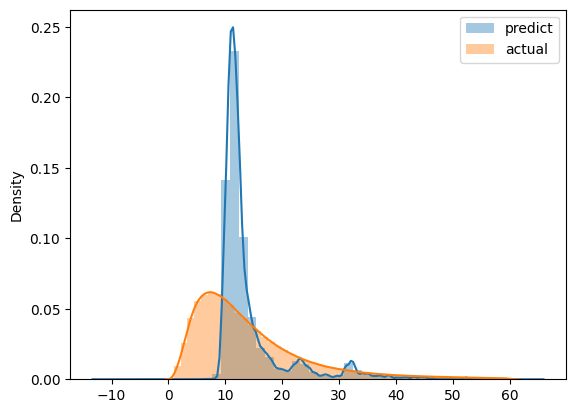

In [24]:
sns.distplot(y_pred, label='predict')
sns.distplot(y_train, label='actual')
plt.legend()

In [25]:
# Calculate the RMSE of the model 
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_train, y_pred, squared=False)

7.649261816031846

### Q6. Evaluating the model

Now let's apply this model to the validation dataset (February 2023).

What's the RMSE on validation?

#### Answer: 7.81182123601909 

In [26]:
def read_dataframe(filename):
    df = pd.read_parquet(filename)
    
    df.tpep_dropoff_datetime = pd.to_datetime(df['tpep_dropoff_datetime'])
    df.tpep_pickup_datetime = pd.to_datetime(df['tpep_pickup_datetime'])

    df['duration'] = df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime'] 
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]
    
    categorical = ['PULocationID','DOLocationID']
    df[categorical] = df[categorical].astype(str) 
    
    return df

In [27]:
df_train = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-01.parquet')
df_val = read_dataframe('https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2023-02.parquet')
len(df_train), len(df_val)

(3009173, 2855951)

In [28]:
categorical = ['PULocationID','DOLocationID']

dv = DictVectorizer()
train_dicts = df_train[categorical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [29]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

7.81182123601909

In [37]:
import os

# Create the 'models' directory 
os.makedirs('models', exist_ok=True)

import pickle
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)

### Training with different models (apart from homework)

In [31]:
from sklearn.linear_model import Lasso

lr = Lasso(alpha=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

7.869967710653122

In [32]:
from sklearn.linear_model import Ridge

lr = Ridge(alpha=0.001)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)
mean_squared_error(y_val, y_pred, squared=False)

7.811645333379862